# Assignment 2 - Machine Learning

In [1]:
import pandas as pd

from sklearn import linear_model
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import datetime as dt

## Importing and picking out relevant data

In [2]:
dataset = pd.read_csv('NAS.csv').dropna()
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0
...,...,...,...,...,...,...,...
4248,2020-10-12,0.709000,0.710000,0.650000,0.676800,0.676800,48320475.0
4249,2020-10-13,0.676800,0.676800,0.600000,0.600600,0.600600,47786200.0
4250,2020-10-14,0.601000,0.640000,0.596200,0.626000,0.626000,37534949.0
4251,2020-10-15,0.626000,0.626000,0.585000,0.605000,0.605000,26737615.0


In [3]:
input = dataset.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
input.head(10)

,Date,Close
0,2003-12-18,19.139799
1,2003-12-19,18.454201
2,2003-12-22,18.054300
3,2003-12-23,17.425800
7,2003-12-29,17.254400
8,2003-12-30,17.711500
11,2004-01-02,17.768600
12,2004-01-05,17.711500
13,2004-01-06,17.597200
14,2004-01-07,17.140100


In [4]:
# Converting date to ordinal. The functions to train the model are not able to use regular datetime or string.
# It needs numerical values.
stockPrice = dataset.Close

date = dataset['Date']
date = pd.to_datetime(date)
date = date.map(dt.datetime.toordinal)
date = date.to_frame()
date

,Date
0,731567
1,731568
2,731571
3,731572
7,731578
...,...
4248,737710
4249,737711
4250,737712
4251,737713


## Creating test and training data

In [5]:
x_train, x_test, y_train, y_test = train_test_split(date, stockPrice, test_size=0.3, random_state=1)

regObj = linear_model.LinearRegression()
regObj.fit(x_train,y_train)

x_train_date = x_train['Date'].apply(dt.datetime.fromordinal)
x_train_date = pd.to_datetime(x_train_date, format='%Y-%m-%d')

x_test_date = x_test['Date'].apply(dt.datetime.fromordinal)
x_test_date = pd.to_datetime(x_test_date, format='%Y-%m-%d')

## Graphing results

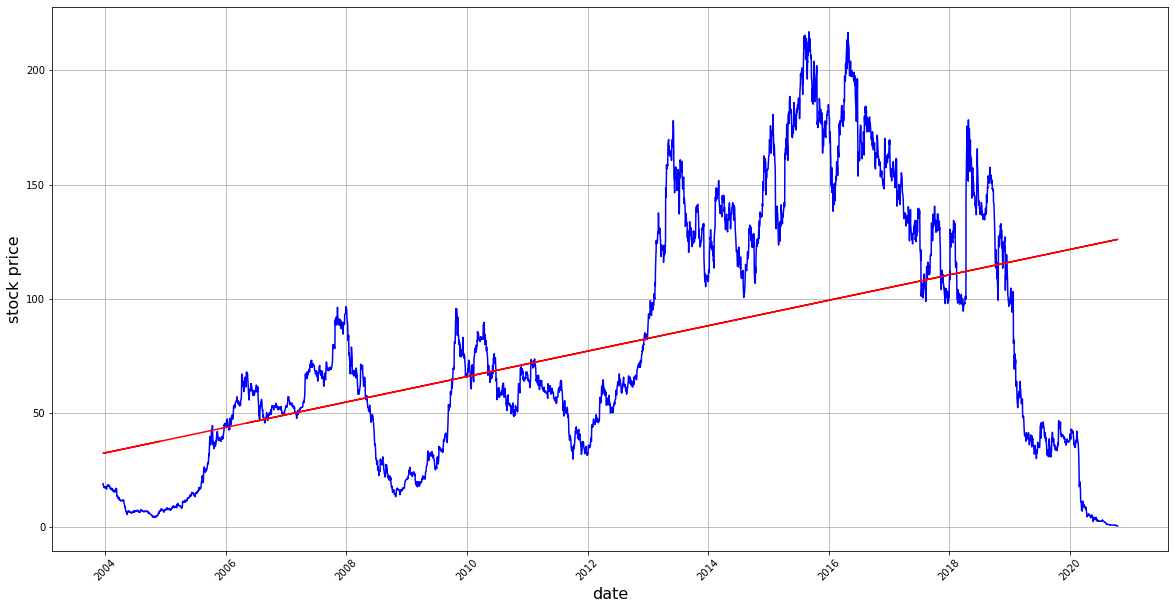

In [6]:
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%Y-%m-%d')

figure(figsize=(20,10))

plt.xlabel('date',fontsize=16)
plt.ylabel('stock price',fontsize=16)
plt.xticks(rotation=45)
plt.grid()

#Visual Represention of linear equation with Linear Regression
#Used plot instead of scatter because it looks cleaner

plt.plot(dataset.Date,dataset.Close,color='blue')
plt.plot(x_train_date,regObj.predict(x_train),color='red')

## Calculating Percentage of error

In [7]:
#Using MAPE (Mean absolute percentage error)

testPredict = regObj.predict(x_test)
diff = abs(y_test - testPredict)
percentDiff = (diff/y_test)
MAPE = percentDiff.sum()/(len(diff))* 100
print(f"Mean Absolute percentage error: {MAPE:.2f}%")

Mean Absolute percentage error: 269.07%
